# Dataset import and exploration
- https://www.kaggle.com/shree1992/housedata

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
736,2014-05-15 00:00:00,1000000.0,5.0,4.25,3920,16258,2.0,0,0,3,2900,1020,1990,2009,2548 111th Ave SE,Bellevue,WA 98004,USA
2062,2014-06-06 00:00:00,539000.0,3.0,2.00,2260,9568,1.0,0,0,3,1780,480,1985,0,21132 NE 42nd St,Sammamish,WA 98074,USA
1012,2014-05-20 00:00:00,619500.0,3.0,2.50,1700,4105,2.0,0,0,3,1700,0,1992,0,3113 E Cherry St,Seattle,WA 98122,USA
860,2014-05-19 00:00:00,475000.0,2.0,1.00,1490,3825,1.0,0,0,3,860,630,1929,0,7008 19th Ave NW,Seattle,WA 98117,USA
2254,2014-06-10 00:00:00,700000.0,5.0,2.75,3100,9825,2.0,0,2,4,3100,0,1950,1982,4251 NE 125th St,Seattle,WA 98125,USA


In [2]:
df.shape

(4600, 18)

In [3]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<br>

# Drop columns we won't need

In [4]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


<br>

# Feature engineering

- Houses that weren't renovated have `yr_renovated = 0`
- Here's how to get the first renovation year

In [5]:
df[df['yr_renovated'] != 0]['yr_renovated'].min()

1912

- Let's create a couple of features:
    - House age 
    - Was the house renovated?
    - Was the renovation recent? (10 years or less)
    - Was the renovation not that recent (more than 10 years but less than 30)
- We'll then drop the original features

In [6]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10 else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30 else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


- A lot of City options

In [7]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

- Let's declare a function that will get rid of all city values that don't occur often
- The original value will be replaced with 'Rare':

In [8]:
def remap_location(data: pd.DataFrame, location: str, threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

- Test:

In [9]:
remap_location(data=df, location='Seattle')

'Seattle'

In [10]:
remap_location(data=df, location='Fall City')

'Rare'

In [11]:
df['city'] = df['city'].apply(lambda x: remap_location(data=df, location=x))
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
4394,0.0,5.0,3.25,3690,12353,2.0,0,0,5,3690,0,Rare,44,0,0,0
718,190000.0,3.0,1.00,1090,8520,1.0,0,0,3,1090,0,Federal Way,54,1,1,0
2802,315000.0,3.0,2.50,1730,6368,2.0,0,0,3,1730,0,Maple Valley,28,0,0,0
444,851000.0,3.0,2.50,3560,107290,2.0,0,0,3,3560,0,Redmond,34,1,0,1
2099,341000.0,4.0,1.75,1920,7665,1.0,0,0,4,1500,420,Renton,46,0,0,0
3545,355000.0,4.0,2.50,1890,7867,2.0,0,0,3,1890,0,Maple Valley,25,0,0,0
1517,700000.0,4.0,3.50,4490,5099,2.0,0,0,3,3390,1100,Snoqualmie,15,0,0,0
1428,365000.0,3.0,1.50,1300,12240,1.0,0,0,3,1300,0,Kenmore,58,1,0,1
2975,425000.0,3.0,2.25,1790,10209,1.0,0,0,3,1290,500,Woodinville,54,1,1,0
773,497000.0,4.0,2.50,2240,7200,2.0,0,0,3,2240,0,Seattle,26,0,0,0


<br>

# Target variable visualization

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

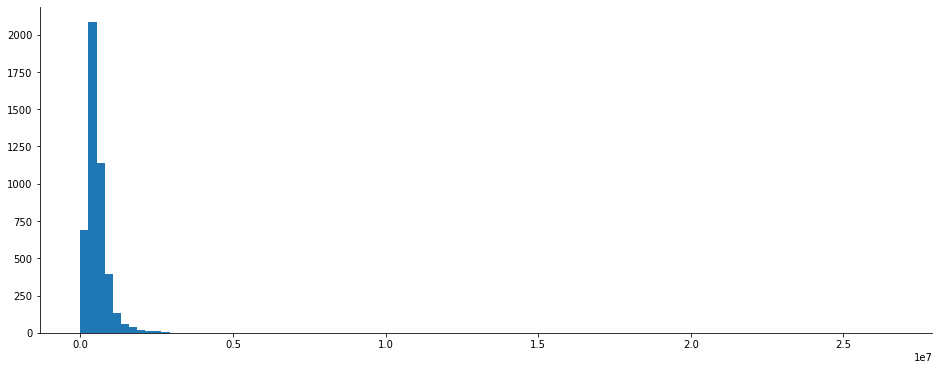

In [13]:
plt.hist(df['price'], bins=100);

- The distribution is highly skewed, so let's calculate Z-scores and remove outliers (assume the distirbution is otherwise normal)

In [14]:
from scipy import stats

df['price_z'] = np.abs(stats.zscore(df['price']))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs,price_z
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1,0.423864
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0,3.249598
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0,0.372424
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0,0.234071
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1,0.003482


In [15]:
df = df[df['price_z'] <= 3]
df.shape

(4566, 17)

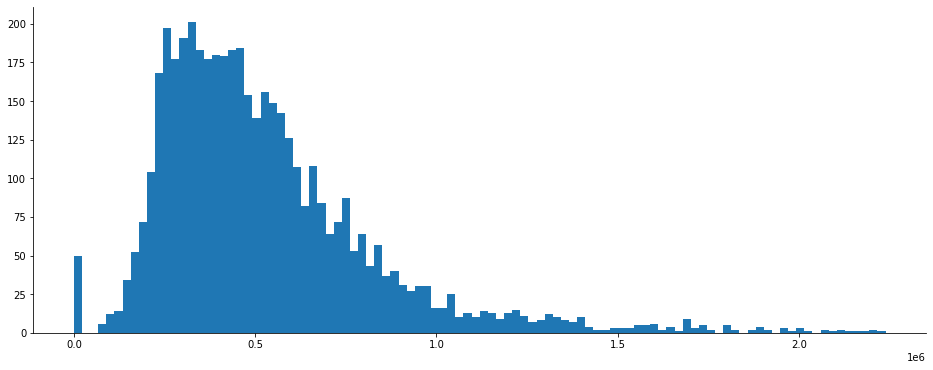

In [16]:
plt.hist(df['price'], bins=100);

- Still a bit of skew present
- There seem to be houses selling for $0
    - Let's remove them:

In [17]:
df[df['price'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs,price_z
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,Federal Way,59,0,0,0,0.979051
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,Seattle,61,1,0,1,0.979051
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,Burien,68,1,0,0,0.979051
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,Issaquah,38,0,0,0,0.979051
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,Burien,101,0,0,0,0.979051
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,Sammamish,31,1,0,1,0.979051
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,Rare,14,0,0,0,0.979051
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,Rare,61,1,0,1,0.979051
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,Snoqualmie,15,0,0,0,0.979051
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,Bellevue,8,1,0,0,0.979051


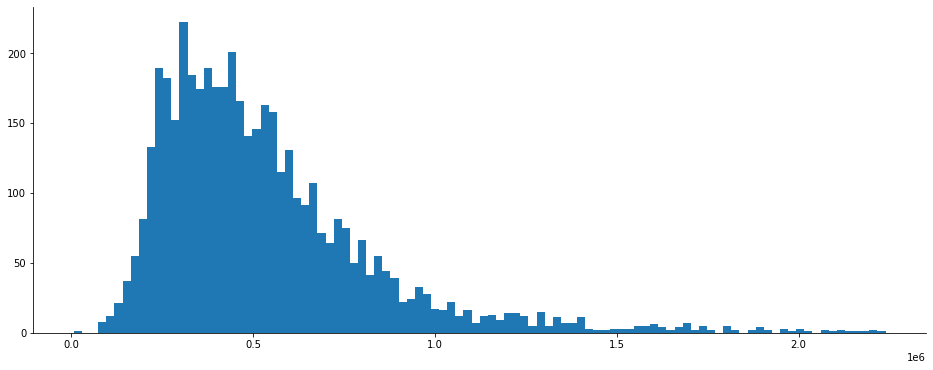

In [18]:
df = df[df['price'] != 0]

plt.hist(df['price'], bins=100);

In [19]:
df = df.drop('price_z', axis=1)

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,83,1,0,1


<br>

# Data preparation for ML

- We'll MinMaxScale the numerical features and one-hot encode the categorical ones
- The features `waterfront`, `was_renovated`, `was_renovated_10_yrs` and `was_renovated_30_yrs` are ignored, since they're already in (0, 1) format

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

transformer = make_column_transformer(
    (MinMaxScaler(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), ['bedrooms', 'bathrooms', 'floors', 'view', 'condition'])
)

- Train/test split - 80:20:

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3613, 15), (904, 15))

- Let's apply the transformations:

In [23]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((3613, 53), (904, 53))

- Sparse array format:

In [25]:
X_train

<3613x53 sparse matrix of type '<class 'numpy.float64'>'
	with 33918 stored elements in Compressed Sparse Row format>

- Convert to array:

In [26]:
X_train.toarray()

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [27]:
X_train = X_train.toarray()
X_test = X_test.toarray()

<br>

# Model training

In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

Init Plugin
Init Graph Optimizer
Init Kernel


- RMSE is the best metric, as the error is displayed in the same units the target variable is in

In [29]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

- Really simple model:

In [30]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Metal device set to: Apple M1
Epoch 1/100


2021-10-04 13:07:52.210577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-04 13:07:52.211252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-10-04 13:07:52.278898: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-04 13:07:52.281322: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 12/113 [==>...........................] - ETA: 0s - loss: 631261.2500 - rmse: 631261.2500 

2021-10-04 13:07:52.439835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 1s 5ms/step - loss: 606316.2500 - rmse: 606331.7500
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 412443.6562 - rmse: 412272.9062
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 266340.6250 - rmse: 266316.5000
Epoch 4/100
113/113 [==============================] - 1s 5ms/step - loss: 247171.2344 - rmse: 247113.8906
Epoch 5/100
113/113 [==============================] - 1s 5ms/step - loss: 237513.7188 - rmse: 237580.4062
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 229471.9531 - rmse: 229423.3438
Epoch 7/100
113/113 [==============================] - 0s 4ms/step - loss: 225892.7188 - rmse: 225861.0469
Epoch 8/100
113/113 [==============================] - 0s 4ms/step - loss: 221565.3281 - rmse: 221595.5156
Epoch 9/100
113/113 [==============================] - 0s 4ms/step - loss: 217731.0625 - rmse: 217674.0312
Epoch 10/100
113/113 [===========================

<br>

- Predict on the test set:

In [31]:
predictions = model.predict(X_test)

2021-10-04 13:08:42.823668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [32]:
predictions[:5]

array([[ 500118.97],
       [ 597861.2 ],
       [1233606.4 ],
       [ 277795.9 ],
       [ 320446.3 ]], dtype=float32)

- Convert to a 1D array before visualization:

In [35]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 500118.97,  597861.2 , 1233606.4 ,  277795.9 ,  320446.3 ],
      dtype=float32)

In [37]:
rmse(y_test, predictions).numpy()

191119.78088467862